In [1]:
import os
import csv
import pandas as pd
import collections as ct
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps 
from config import gkey 





In [2]:
gmaps.configure(api_key=gkey)


In [3]:
chum_path = 'C:/Users/bassa/projects/wildfire/resources/'
chum_csv_file = 'fire_clean.csv'
chum_csv_filepath = os.path.join(chum_path, chum_csv_file)
print(chum_csv_filepath)

C:/Users/bassa/projects/wildfire/resources/fire_clean.csv


In [4]:
dirty_fire = pd.read_csv(chum_csv_filepath)

In [5]:
clean_df = pd.read_csv(chum_csv_filepath, lineterminator='\n')

In [6]:
clean_df.head()

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA


In [7]:
states_number = clean_df['STATE'].nunique()

states_number 

52

In [8]:
lat_mode = clean_df["LATITUDE"].mode()

lat_mode 


0    47.8666
dtype: float64

In [9]:
long_mode = clean_df["LONGITUDE"].mode()

long_mode

0   -110.4518
dtype: float64

In [10]:
state_mode = clean_df["STATE"].mode()

state_mode

0    CA
dtype: object

In [11]:
source_mode = clean_df["SOURCE_REPORTING_UNIT_NAME"].mode()

source_mode

0    Georgia Forestry Commission
dtype: object

In [12]:
class_mode = clean_df["FIRE_SIZE_CLASS"].mode()

class_mode

0    B
dtype: object

In [13]:
class_max = clean_df["FIRE_SIZE"].max()

class_max

606945.0

In [14]:
locations = clean_df[["LATITUDE", "LONGITUDE"]]

locations

,LATITUDE,LONGITUDE
0,40.036944,-121.005833
1,38.933056,-120.404444
2,38.984167,-120.735556
3,38.559167,-119.913333
4,38.559167,-119.933056
...,...,...
1880460,40.481637,-122.389375
1880461,37.617619,-120.938570
1880462,37.617619,-120.938570
1880463,37.672235,-120.898356


In [15]:
clean_df["STATE"].mode()

0    CA
dtype: object

In [16]:
size_mean = clean_df["FIRE_SIZE"].mean

clean_df

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,ST-CACDF,Shasta-Trinity Unit,2015,Missing/Undefined,0.01,A,40.481637,-122.389375,CA
1880461,300348373,ST-CACDF,Tuolumne-Calaveras Unit,2015,Miscellaneous,0.20,A,37.617619,-120.938570,CA
1880462,300348375,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,0.10,A,37.617619,-120.938570,CA
1880463,300348377,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,2.00,B,37.672235,-120.898356,CA


In [17]:
most_common_source = clean_df["STAT_CAUSE_DESCR"].mode()

most_common_source 

0    Debris Burning
dtype: object

In [18]:
cause_and_size = clean_df[["STATE","STAT_CAUSE_DESCR"]]

cause_and_size = cause_and_size.set_index("STATE")

cause_and_size.head()


,STAT_CAUSE_DESCR
STATE,
CA,Miscellaneous
CA,Lightning
CA,Debris Burning
CA,Lightning
CA,Lightning


In [19]:
causes = clean_df['STAT_CAUSE_DESCR']

In [20]:
x_axis = np.arange(len(clean_df))
tick_locations = [value+0.4 for value in x_axis]

In [21]:
causes.nunique()

13

In [22]:
causes = clean_df.iloc[:,4]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral", "magenta", "turquoise", "maroon"]

In [23]:
cause_counts = causes.value_counts("Arson")

cause_counts

Debris Burning       0.228150
Miscellaneous        0.172194
Arson                0.149673
Lightning            0.148085
Missing/Undefined    0.088661
Equipment Use        0.078498
Campfire             0.040489
Children             0.032528
Smoking              0.028115
Railroad             0.017791
Powerline            0.007683
Fireworks            0.006116
Structure            0.002019
Name: STAT_CAUSE_DESCR, dtype: float64

([<matplotlib.patches.Wedge at 0x1c4eb0c3388>,
 [Text(-3.2994278001829493, -0.061450723184542526, 'Debris Burning'),
  Text(-0.9577232857201363, -3.1579686679872916, 'Miscellaneous'),
  Text(2.1678195822330717, -2.488083249991212, 'Arson'),
  Text(3.2890847427453838, 0.2681819439103508, 'Lightning'),
  Text(2.2389619587027765, 2.42426263995505, 'Missing/Undefined'),
  Text(0.7218958645126357, 3.2200724154589375, 'Equipment Use'),
  Text(-0.5038101560856434, 3.2613149689389034, 'Campfire'),
  Text(-1.232181781243174, 3.0613278259559857, 'Children'),
  Text(-1.7895917065630873, 2.7726091545330758, 'Smoking'),
  Text(-2.169486006789724, 2.4866303437269437, 'Railroad'),
  Text(-2.3613324873963006, 2.305235103837958, 'Powerline'),
  Text(-2.4590146148741154, 2.200737858954471, '.'),
  Text(-2.5144437698239477, 2.137187995566496, '.')],
 [Text(-1.7996878910088812, -0.03351857628247774, '22.8%'),
  Text(-0.5223945194837106, -1.7225283643567042, '17.2%'),
  Text(1.1824470448544024, -1.35713631

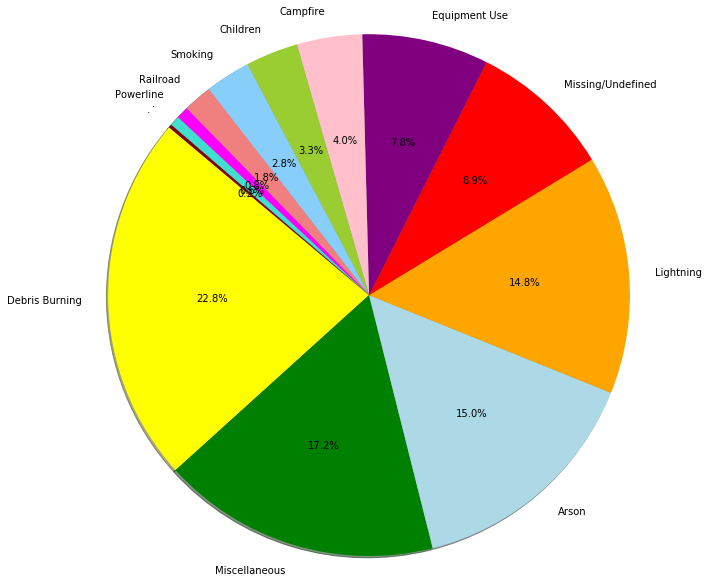

In [24]:
plt.pie(cause_counts,labels=["Debris Burning", "Miscellaneous", "Arson", "Lightning", "Missing/Undefined", "Equipment Use", "Campfire", "Children", "Smoking", "Railroad", "Powerline", ".", "."], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=3)
#plt.figure(figsize=(40,20))


In [27]:
x_axis = clean_df.iloc[:,9]
y_axis = clean_df.iloc[:,4]

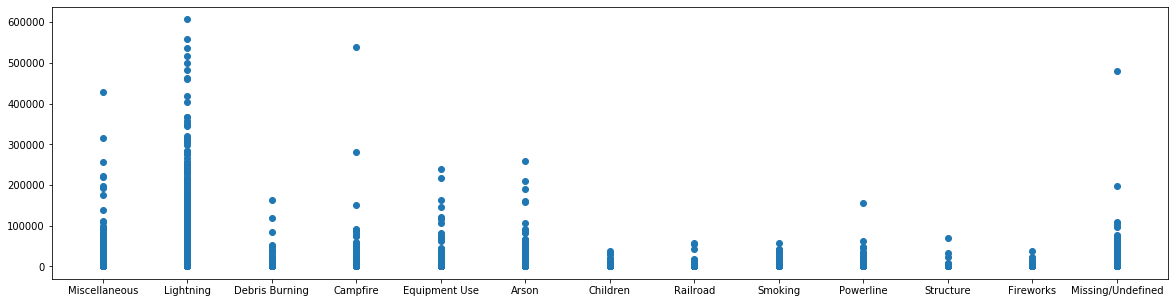

In [28]:
plt.figure(figsize=(20,5))

plt.scatter(clean_df.iloc[:,4], clean_df.iloc[:,5])



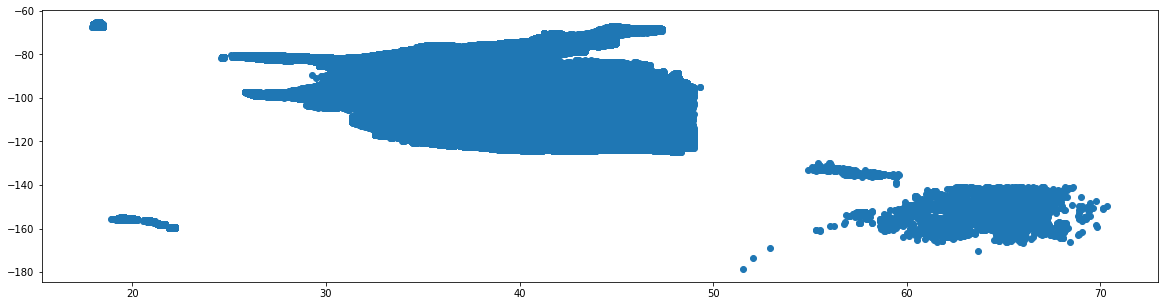

In [29]:
plt.figure(figsize=(20,5))

plt.scatter(clean_df.iloc[:,7], clean_df.iloc[:,8])
